## Loading Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 

## Data Loading

In [3]:
df = pd.read_csv('data/telecommunication_customer_details.csv')

## Data Visualization and Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [5]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df.tail()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

## Feature set
#### To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [35]:
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

## Define Label 

In [36]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## Train Test Split  

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print('Train Set:', x_train.shape, y_train.shape)
print('Test Set:', y_test.shape, y_test.shape)

Train Set: (800, 11) (800,)
Test Set: (200,) (200,)


## Normalize Data 

In [38]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [39]:
x_train_norm = scaler.transform(x_train.astype(float))
x_train_norm[0:5]

array([[-1.28618818e+00, -1.53085556e+00, -8.49354628e-01,
         1.00752834e+00, -7.46393214e-01, -4.83608776e-01,
         1.12305195e+00, -7.02283455e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02,  2.51253999e-01,  3.44957012e-01,
         1.00752834e+00,  2.45326718e-01, -2.71543263e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -7.80493639e-01, -6.90113076e-01,
         1.00752834e+00, -5.21892614e-02, -4.92444839e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02, -1.53085556e+00, -3.71629972e-01,
        -9.92527915e-01,  1.46154725e-01, -4.74772713e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01, -9.33814526e-01],
       [ 1.19022709e+00, -2.17722200e-01, -6.10492300e-01,
        -9.92527915e-01, -2.50533248e-01,  2.40948394e-01,
  

## Classifiaction

In [40]:
from sklearn.neighbors import KNeighborsClassifier

## Training

In [41]:
k = 4 
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train_norm, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [42]:
x_test_norm = scaler.transform(x_test.astype(float))
x_test_norm[0:5]

array([[-1.28618818e+00, -9.68084119e-01, -9.28975404e-01,
         1.00752834e+00, -3.49705241e-01,  1.08407449e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -1.48395794e+00, -1.32767644e-01,
        -9.92527915e-01,  4.69827318e-02, -3.51067830e-01,
        -5.40728715e-01, -6.01975159e-01, -2.23313158e-01,
        -1.01005050e+00, -9.33814526e-01],
       [-1.28618818e+00, -5.46005540e-01,  1.53926865e+00,
         1.00752834e+00, -5.48049227e-01,  3.02800836e-01,
         1.12305195e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01,  1.14132887e+00],
       [-1.28618818e+00, -7.80493639e-01, -8.49354628e-01,
         1.00752834e+00, -1.14308119e+00, -4.92444839e-01,
         1.12305195e+00, -9.02900046e-01, -2.23313158e-01,
        -1.01005050e+00,  4.49614402e-01],
       [-1.28618818e+00,  4.85742098e-01, -1.00859618e+00,
         1.00752834e+00, -7.46393214e-01,  1.08407449e-01,
  

## Predicting

In [45]:
yhat = neigh.predict(x_test_norm)
yhat[0:5]

array([1, 1, 3, 2, 4])

## Accuracy Evaluation

In [48]:
from sklearn import metrics
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train_norm)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train Set Accuracy:  0.5475
Test Set Accuracy:  0.32


In [50]:
k=6
neigh6 = KNeighborsClassifier(n_neighbors=k).fit(x_train_norm, y_train)
neigh6

KNeighborsClassifier(n_neighbors=6)

In [51]:
yhat6 = neigh6.predict(x_test_norm)
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(x_train_norm)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train Set Accuracy:  0.5125
Test Set Accuracy:  0.31


In [58]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_norm,y_train)
    yhat=neigh.predict(x_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.305, 0.315, 0.32 , 0.315, 0.31 , 0.33 , 0.325, 0.335])

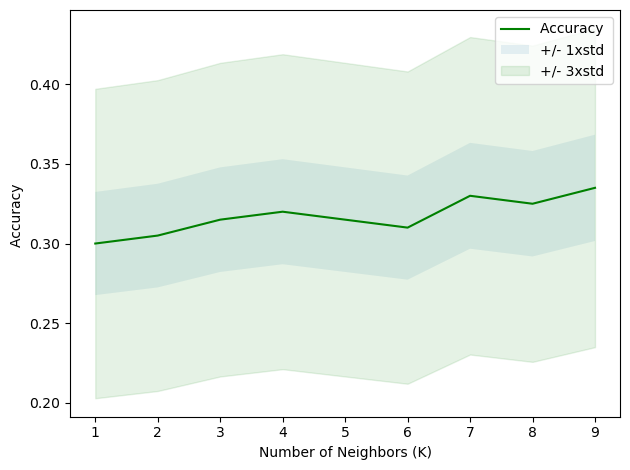

In [55]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()